In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np
import os.path as osp
import argparse
from collections import OrderedDict, defaultdict
import ast
import glob

from dassl.utils import check_isfile, listdir_nohidden

from utils import parse_function, parse_function_1ls

In [6]:
cd ..

/export/livia/home/vision/Qgopee/code/SSDG/FBC-SA-exp


In [3]:
keyword = "accuracy"
pattern = "log.txt"
end_signal = "=> result"
metric = {
    "name": keyword,
    "regex": re.compile(fr"\* {keyword}: ([\.\deE+-]+)%"),
}

### exp_l_only

In [7]:
experiments = ["", "alpha_1", "alpha_2", "alpha_3", "alpha_4", "alpha_5"]
batch_sizes = [16, 32]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for exp in experiments:
        for bs in batch_sizes:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/exp_l_only/{exp}/batchsize_{bs}/FBCSA/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(exp, bs, t)] = (avg, std)
                print(f"Average {keyword} for {exp} and batchsize {bs}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for  and batchsize 16: 74.9% +- 12.9%
Average accuracy for  and batchsize 32: 78.6% +- 10.3%
Average accuracy for alpha_1 and batchsize 16: 72.6% +- 10.0%
Average accuracy for alpha_1 and batchsize 32: 67.9% +- 10.2%
Average accuracy for alpha_2 and batchsize 16: 74.6% +- 12.9%
Average accuracy for alpha_2 and batchsize 32: 81.8% +- 11.3%
Average accuracy for alpha_3 and batchsize 16: 78.6% +- 9.3%
Average accuracy for alpha_3 and batchsize 32: 79.9% +- 10.8%
Average accuracy for alpha_4 and batchsize 16: 75.6% +- 10.9%
Average accuracy for alpha_4 and batchsize 32: 77.8% +- 10.3%
Average accuracy for alpha_5 and batchsize 16: 74.0% +- 13.3%
Average accuracy for alpha_5 and batchsize 32: 77.7% +- 10.6%
-----------------------------------------------------------
Target: art_painting
Average accuracy for  and batchsize 16: 72.9% +- 5.4%
Average accuracy for  and batchsize 32: 75.9% +- 6.7%
Average accuracy for alpha_1 and batchsize 16: 59.9% +- 8.4%
Average

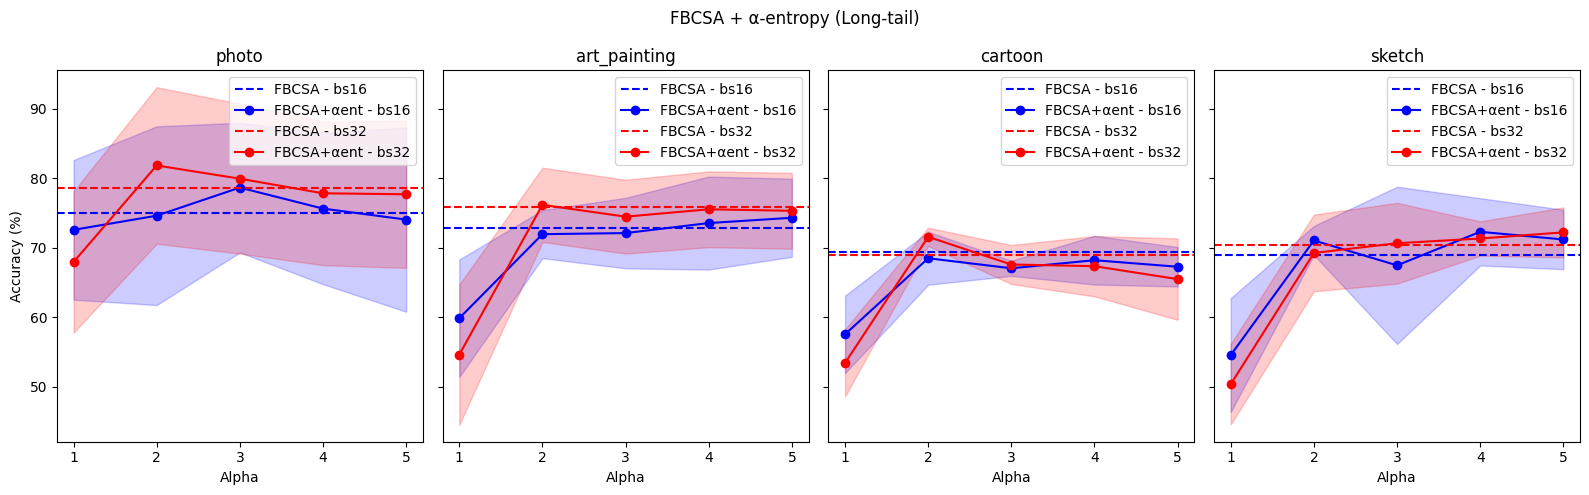

In [43]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('FBCSA + α-entropy (Long-tail)')

# Define colors for each batch size
colors = ['blue', 'red']

# Iterate over targets
for i, target in enumerate(targets):
    # Iterate over batch sizes
    for j, bs in enumerate(batch_sizes):
        # Plot the baseline
        try:
            ax[i].axhline(y=results[('', bs, target)][0], linestyle='--', label=f'FBCSA - bs{bs}', color=colors[j])
        except KeyError:
            pass
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for exp in experiments[1::]:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(exp, bs, target)]
                x_values.append(int(exp.split('_')[1]))
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'FBCSA+αent - bs{bs}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

### original

In [44]:
experiments = ["", "alpha/alpha_1", "alpha/alpha_2", "alpha/alpha_3", "alpha/alpha_4", "alpha/alpha_5"]
batch_sizes = [16, 32]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for exp in experiments:
        for bs in batch_sizes:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/{exp}/batchsize_{bs}/FBCSA/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(exp, bs, t)] = (avg, std)
                print(f"Average {keyword} for {exp} and batchsize {bs}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for  and batchsize 16: 87.5% +- 2.0%
Average accuracy for  and batchsize 32: 88.6% +- 1.3%
Average accuracy for alpha/alpha_1 and batchsize 16: 87.0% +- 1.7%
Average accuracy for alpha/alpha_1 and batchsize 32: 86.6% +- 1.5%
Average accuracy for alpha/alpha_2 and batchsize 16: 82.0% +- 7.3%
Average accuracy for alpha/alpha_2 and batchsize 32: 89.9% +- 0.7%
Average accuracy for alpha/alpha_3 and batchsize 16: 84.0% +- 5.2%
Average accuracy for alpha/alpha_3 and batchsize 32: 88.6% +- 0.9%
Average accuracy for alpha/alpha_4 and batchsize 16: 83.6% +- 5.4%
Average accuracy for alpha/alpha_4 and batchsize 32: 89.1% +- 1.1%
Average accuracy for alpha/alpha_5 and batchsize 16: 83.4% +- 6.7%
Average accuracy for alpha/alpha_5 and batchsize 32: 89.3% +- 1.2%
-----------------------------------------------------------
Target: art_painting
Average accuracy for  and batchsize 16: 78.3% +- 2.1%
Average accuracy for  and batchsize 32: 78.6% +- 3.2%
Average accuracy fo

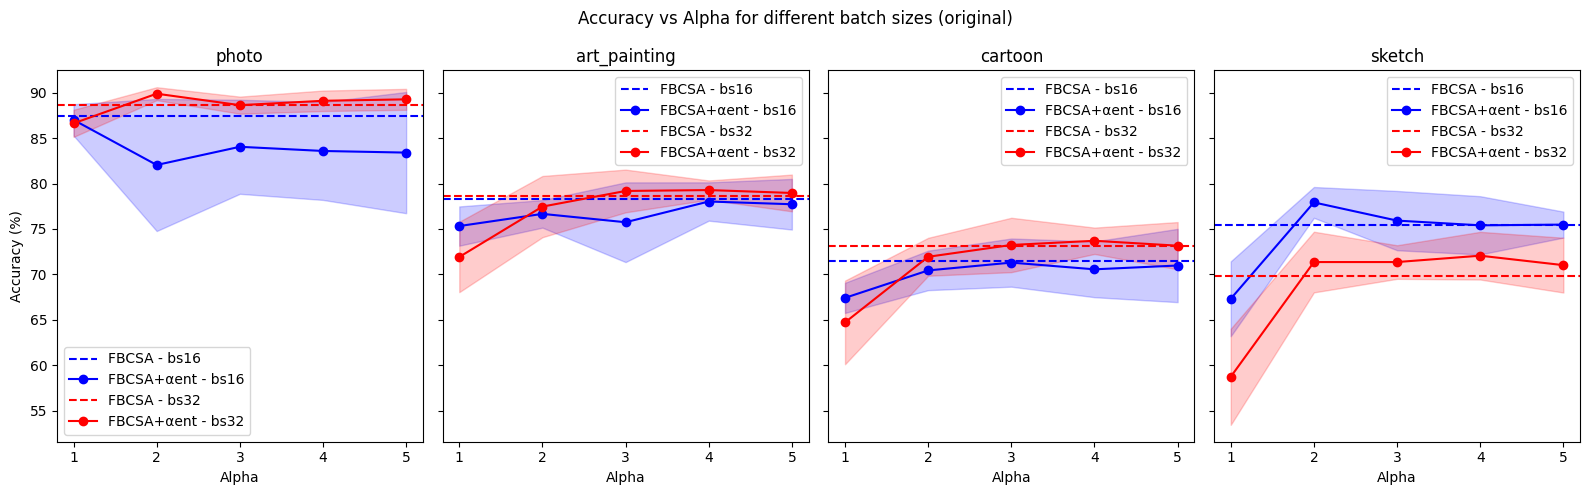

In [45]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different batch sizes (original)')

# Define colors for each batch size
colors = ['blue', 'red']

# Iterate over targets
for i, target in enumerate(targets):
    # Iterate over batch sizes
    for j, bs in enumerate(batch_sizes):
        # Plot the baseline
        try:
            ax[i].axhline(y=results[('', bs, target)][0], linestyle='--', label=f'FBCSA - bs{bs}', color=colors[j])
        except KeyError:
            pass
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for exp in experiments[1::]:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(exp, bs, target)]
                x_values.append(int(exp.split('_')[1]))
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'FBCSA+αent - bs{bs}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

### MI : alpha + lambda

In [46]:
lambdas = [0, 1]
alphas = [0, 0.1, 0.5, 1, 2, 5, 10]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/MI/lambdad_{lam}_alpha_{alpha}/batchsize_16/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 85.9% +- 2.7%
Average accuracy for lambdad_0_alpha_0.1: 86.0% +- 2.9%
Average accuracy for lambdad_0_alpha_0.5: 81.8% +- 9.9%
Average accuracy for lambdad_0_alpha_1: 83.1% +- 8.6%
Average accuracy for lambdad_0_alpha_2: 84.3% +- 4.6%
Average accuracy for lambdad_0_alpha_5: 82.3% +- 8.3%
Average accuracy for lambdad_0_alpha_10: 86.3% +- 2.9%
Average accuracy for lambdad_1_alpha_0: 87.2% +- 2.1%
Average accuracy for lambdad_1_alpha_0.1: 84.5% +- 4.2%
Average accuracy for lambdad_1_alpha_0.5: 86.7% +- 1.4%
Average accuracy for lambdad_1_alpha_1: 86.9% +- 1.7%
Average accuracy for lambdad_1_alpha_2: 81.0% +- 7.7%
Average accuracy for lambdad_1_alpha_5: 80.6% +- 8.5%
Average accuracy for lambdad_1_alpha_10: 82.8% +- 6.9%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 77.3% +- 2.4%
Average accuracy for lambdad_0_alpha_0.1: 75.8% +- 2.4%
Average accuracy for lambdad_

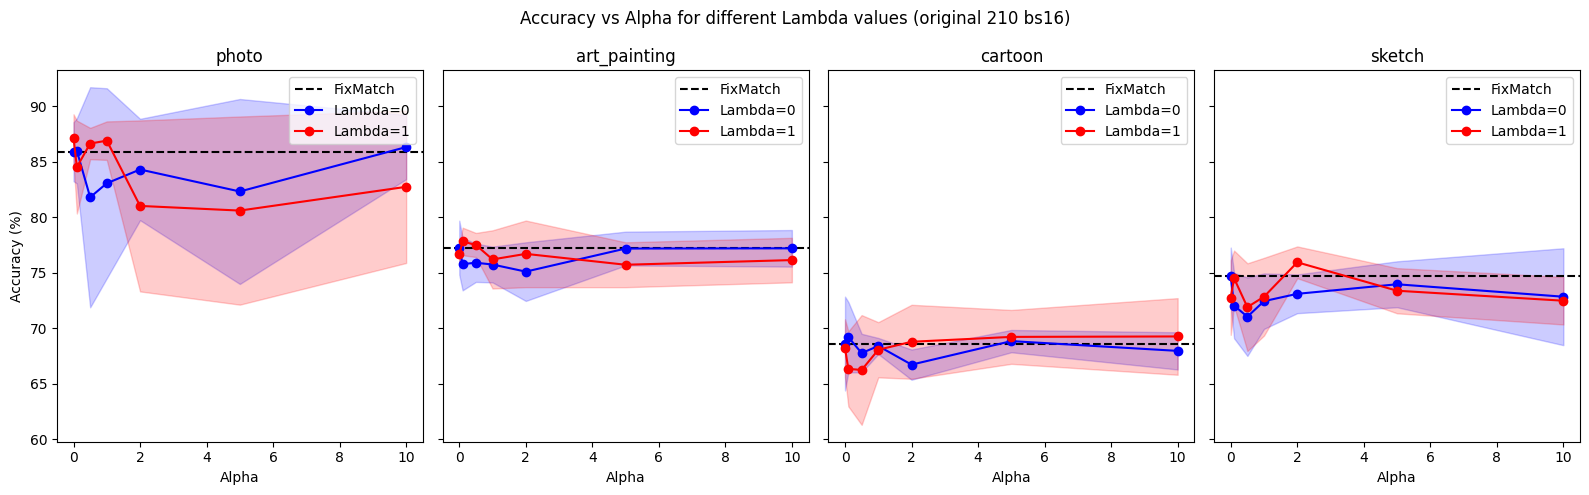

In [47]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different Lambda values (original 210 bs16)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()


In [48]:
lambdas = [0, 1]
alphas = [0, 0.1, 0.5, 1, 2, 5, 10]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/MI/lambdad_{lam}_alpha_{alpha}/batchsize_32/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 91.1% +- 1.3%
Average accuracy for lambdad_0_alpha_0.1: 90.8% +- 1.2%
Average accuracy for lambdad_0_alpha_0.5: 90.6% +- 1.4%
Average accuracy for lambdad_0_alpha_1: 90.6% +- 1.4%
Average accuracy for lambdad_0_alpha_2: 90.7% +- 1.3%
Average accuracy for lambdad_0_alpha_5: 89.9% +- 2.4%
Average accuracy for lambdad_0_alpha_10: 90.5% +- 1.6%
Average accuracy for lambdad_1_alpha_0: 89.9% +- 1.4%
Average accuracy for lambdad_1_alpha_0.1: 90.3% +- 1.7%
Average accuracy for lambdad_1_alpha_0.5: 90.8% +- 1.1%
Average accuracy for lambdad_1_alpha_1: 90.5% +- 1.5%
Average accuracy for lambdad_1_alpha_2: 90.9% +- 1.6%
Average accuracy for lambdad_1_alpha_5: 90.0% +- 1.3%
Average accuracy for lambdad_1_alpha_10: 89.9% +- 1.7%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 78.9% +- 1.0%
Average accuracy for lambdad_0_alpha_0.1: 79.1% +- 1.3%
Average accuracy for lambdad_

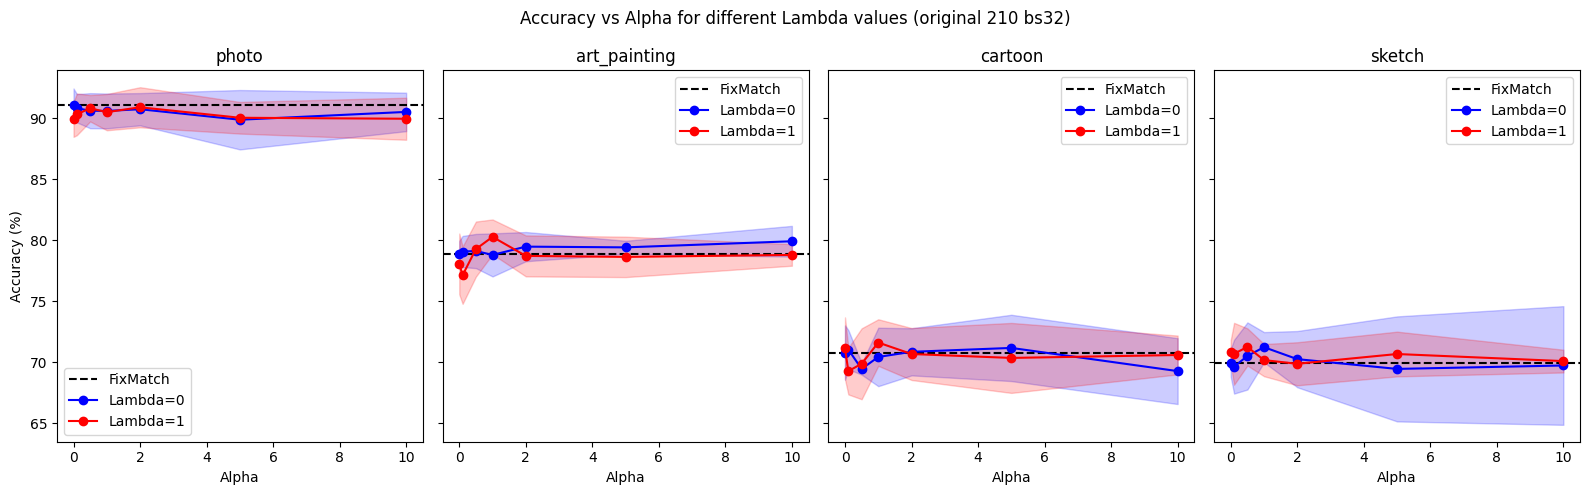

In [49]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different Lambda values (original 210 bs32)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()


In [50]:
lambdas = [0, 1]
alphas = [0, 0.1, 0.5, 1, 2, 5, 10]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/exp_l_only/MI/lambdad_{lam}_alpha_{alpha}/batchsize_16/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 83.5% +- 4.9%
Average accuracy for lambdad_0_alpha_0.1: 84.9% +- 1.8%
Average accuracy for lambdad_0_alpha_0.5: 85.5% +- 2.1%
Average accuracy for lambdad_0_alpha_1: 83.3% +- 2.5%
Average accuracy for lambdad_0_alpha_2: 81.7% +- 6.2%
Average accuracy for lambdad_0_alpha_5: 78.7% +- 10.8%
Average accuracy for lambdad_0_alpha_10: 84.9% +- 1.9%
Average accuracy for lambdad_1_alpha_0: 85.6% +- 1.3%
Average accuracy for lambdad_1_alpha_0.1: 84.2% +- 3.8%
Average accuracy for lambdad_1_alpha_0.5: 77.3% +- 11.1%


Average accuracy for lambdad_1_alpha_1: 84.9% +- 2.7%
Average accuracy for lambdad_1_alpha_2: 84.1% +- 2.8%
Average accuracy for lambdad_1_alpha_5: 76.4% +- 11.7%
Average accuracy for lambdad_1_alpha_10: 84.7% +- 2.9%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 71.8% +- 2.2%
Average accuracy for lambdad_0_alpha_0.1: 74.0% +- 2.7%
Average accuracy for lambdad_0_alpha_0.5: 70.9% +- 2.3%
Average accuracy for lambdad_0_alpha_1: 73.5% +- 3.5%
Average accuracy for lambdad_0_alpha_2: 73.3% +- 2.4%
Average accuracy for lambdad_0_alpha_5: 73.6% +- 2.3%
Average accuracy for lambdad_0_alpha_10: 71.8% +- 4.6%
Average accuracy for lambdad_1_alpha_0: 70.6% +- 3.2%
Average accuracy for lambdad_1_alpha_0.1: 73.9% +- 2.7%
Average accuracy for lambdad_1_alpha_0.5: 72.9% +- 2.5%
Average accuracy for lambdad_1_alpha_1: 70.2% +- 3.0%
Average accuracy for lambdad_1_alpha_2: 71.5% +- 4.4%
Average accuracy for lambdad_1_alpha_5: 72.1

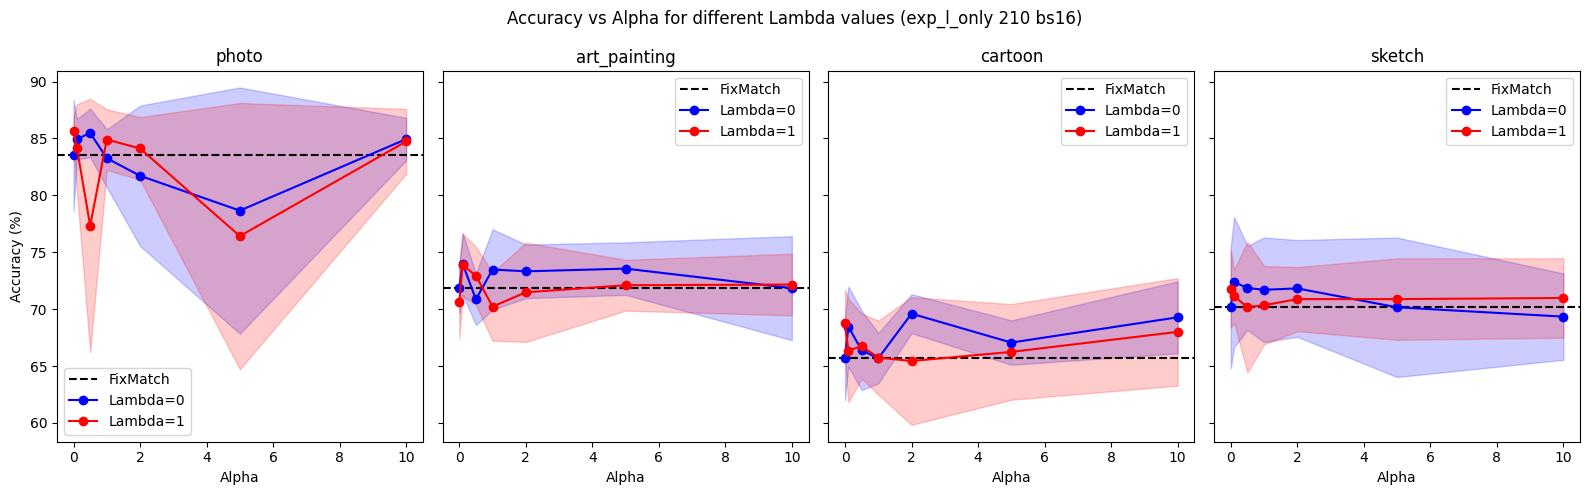

In [51]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different Lambda values (exp_l_only 210 bs16)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()
    # ax[i].set_xscale('log')

plt.tight_layout()
plt.show()

In [52]:
lambdas = [0, 1]
alphas = [0, 0.1, 0.5, 1, 2, 5, 10]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/exp_l_only/MI/lambdad_{lam}_alpha_{alpha}/batchsize_32/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 89.7% +- 1.5%
Average accuracy for lambdad_0_alpha_0.1: 89.6% +- 2.2%
Average accuracy for lambdad_0_alpha_0.5: 89.7% +- 1.2%
Average accuracy for lambdad_0_alpha_1: 89.1% +- 1.2%
Average accuracy for lambdad_0_alpha_2: 89.9% +- 2.0%
Average accuracy for lambdad_0_alpha_5: 88.8% +- 1.7%
Average accuracy for lambdad_0_alpha_10: 89.2% +- 1.9%
Average accuracy for lambdad_1_alpha_0: 85.0% +- 9.8%
Average accuracy for lambdad_1_alpha_0.1: 84.3% +- 11.2%
Average accuracy for lambdad_1_alpha_0.5: 89.5% +- 1.3%
Average accuracy for lambdad_1_alpha_1: 89.1% +- 1.8%
Average accuracy for lambdad_1_alpha_2: 89.9% +- 1.6%
Average accuracy for lambdad_1_alpha_5: 88.6% +- 2.3%
Average accuracy for lambdad_1_alpha_10: 88.8% +- 1.0%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 76.4% +- 2.1%
Average accuracy for lambdad_0_alpha_0.1: 76.9% +- 1.5%
Average accuracy for lambdad

Average accuracy for lambdad_1_alpha_2: 68.9% +- 4.2%
Average accuracy for lambdad_1_alpha_5: 68.0% +- 2.8%
Average accuracy for lambdad_1_alpha_10: 67.0% +- 2.4%
-----------------------------------------------------------
Target: sketch
Average accuracy for lambdad_0_alpha_0: 68.1% +- 3.7%
Average accuracy for lambdad_0_alpha_0.1: 69.6% +- 2.8%
Average accuracy for lambdad_0_alpha_0.5: 69.7% +- 2.2%
Average accuracy for lambdad_0_alpha_1: 69.3% +- 5.0%
Average accuracy for lambdad_0_alpha_2: 71.0% +- 4.4%
Average accuracy for lambdad_0_alpha_5: 68.8% +- 3.8%
Average accuracy for lambdad_0_alpha_10: 69.8% +- 3.0%
Average accuracy for lambdad_1_alpha_0: 69.4% +- 4.4%
Average accuracy for lambdad_1_alpha_0.1: 69.6% +- 4.1%
Average accuracy for lambdad_1_alpha_0.5: 65.9% +- 4.7%
Average accuracy for lambdad_1_alpha_1: 69.6% +- 3.8%
Average accuracy for lambdad_1_alpha_2: 69.8% +- 3.8%
Average accuracy for lambdad_1_alpha_5: 68.4% +- 3.1%
Average accuracy for lambdad_1_alpha_10: 68.3% +- 1

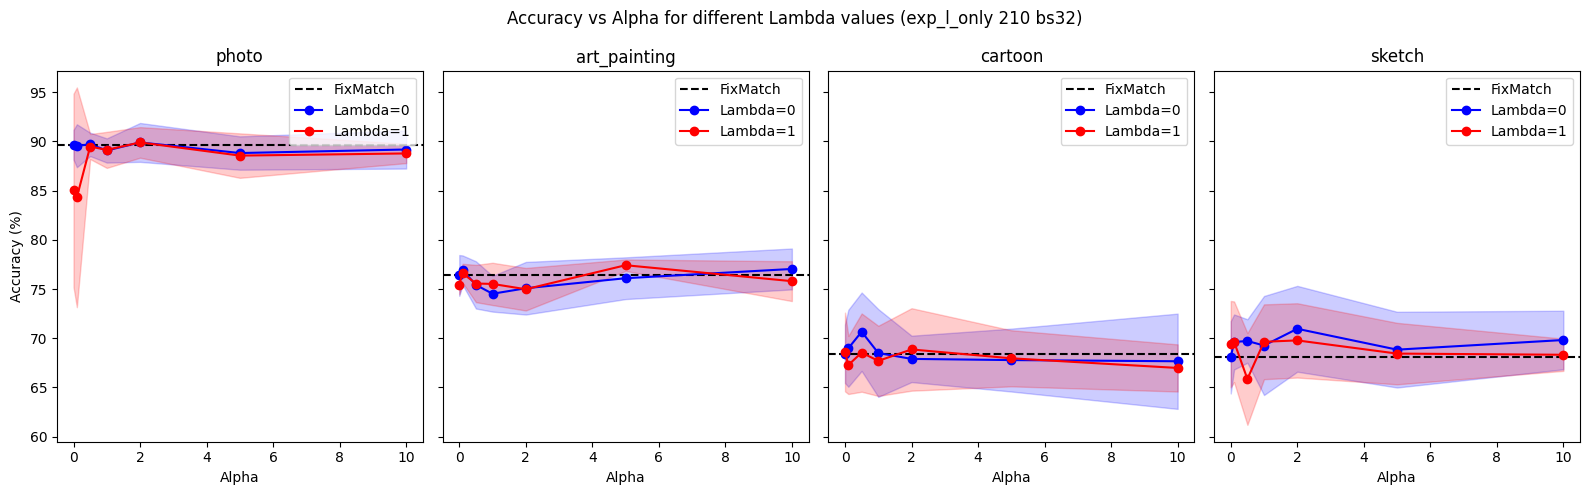

In [53]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different Lambda values (exp_l_only 210 bs32)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()
    # ax[i].set_xscale('log')

plt.tight_layout()
plt.show()

## One source labelled

In [54]:
lambdas = [0]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/one_source_l/exp_l_only/MI/lambdad_{lam}_alpha_{alpha}/batchsize_16/MI/resnet18/{t}"
                avg, std = parse_function_1ls(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 67.7% +- 18.0%
Average accuracy for lambdad_0_alpha_0.1: 69.5% +- 19.0%
Average accuracy for lambdad_0_alpha_0.5: 65.9% +- 20.1%
Average accuracy for lambdad_0_alpha_1: 69.3% +- 19.4%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 58.9% +- 10.4%
Average accuracy for lambdad_0_alpha_0.1: 60.1% +- 12.2%
Average accuracy for lambdad_0_alpha_0.5: 61.6% +- 10.8%
Average accuracy for lambdad_0_alpha_1: 61.5% +- 11.0%
-----------------------------------------------------------
Target: cartoon


Average accuracy for lambdad_0_alpha_0: 57.3% +- 7.1%
Average accuracy for lambdad_0_alpha_0.1: 58.7% +- 7.2%
Average accuracy for lambdad_0_alpha_0.5: 58.0% +- 7.2%
Average accuracy for lambdad_0_alpha_1: 58.4% +- 5.5%
-----------------------------------------------------------
Target: sketch
Average accuracy for lambdad_0_alpha_0: 60.3% +- 9.1%
Average accuracy for lambdad_0_alpha_0.1: 61.6% +- 10.2%
Average accuracy for lambdad_0_alpha_0.5: 62.4% +- 9.8%
Average accuracy for lambdad_0_alpha_1: 62.3% +- 8.8%
-----------------------------------------------------------


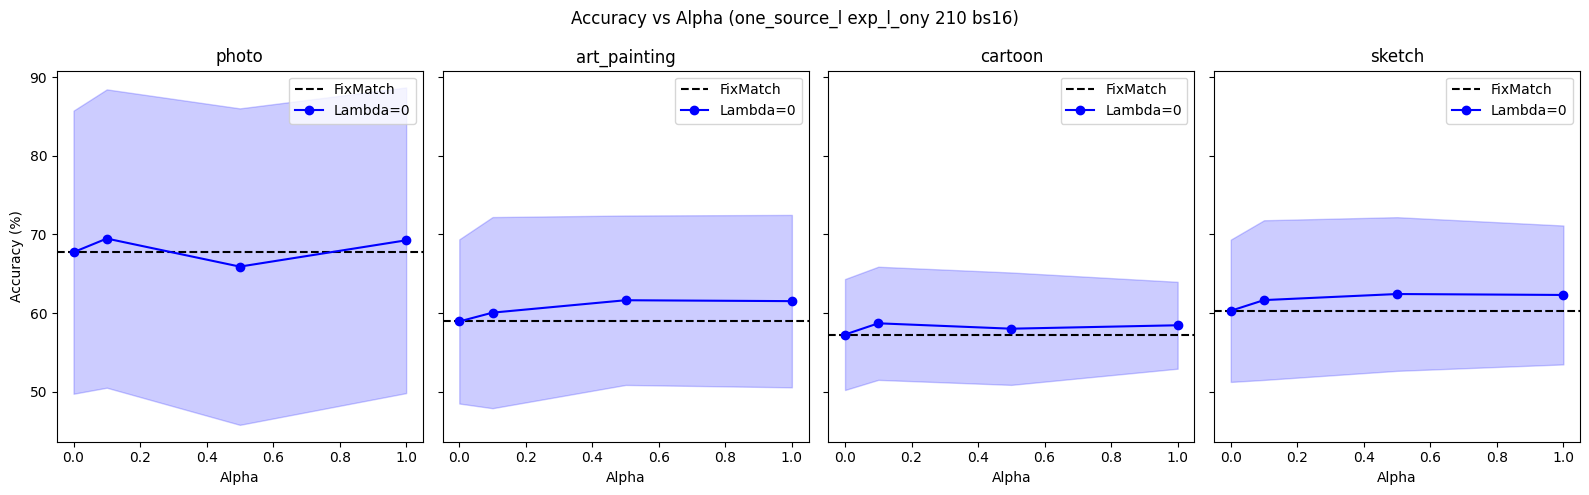

In [55]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha (one_source_l exp_l_ony 210 bs16)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [56]:
lambdas = [0]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/one_source_l/exp_l_only/MI/lambdad_{lam}_alpha_{alpha}/batchsize_32/MI/resnet18/{t}"
                avg, std = parse_function_1ls(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 74.9% +- 19.6%
Average accuracy for lambdad_0_alpha_0.1: 75.3% +- 19.6%
Average accuracy for lambdad_0_alpha_0.5: 74.6% +- 20.6%
Average accuracy for lambdad_0_alpha_1: 76.9% +- 18.0%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 69.2% +- 11.8%
Average accuracy for lambdad_0_alpha_0.1: 70.0% +- 11.6%
Average accuracy for lambdad_0_alpha_0.5: 69.7% +- 12.2%
Average accuracy for lambdad_0_alpha_1: 69.4% +- 10.8%
-----------------------------------------------------------
Target: cartoon
Average accuracy for lambdad_0_alpha_0: 61.3% +- 6.4%
Average accuracy for lambdad_0_alpha_0.1: 60.6% +- 5.2%
Average accuracy for lambdad_0_alpha_0.5: 60.9% +- 5.8%
Average accuracy for lambdad_0_alpha_1: 60.1% +- 6.7%
-----------------------------------------------------------
Target: sketch
Average accuracy for lambdad_0_alpha_0: 59.6% +- 11.3%
Average accuracy for lambdad_0_

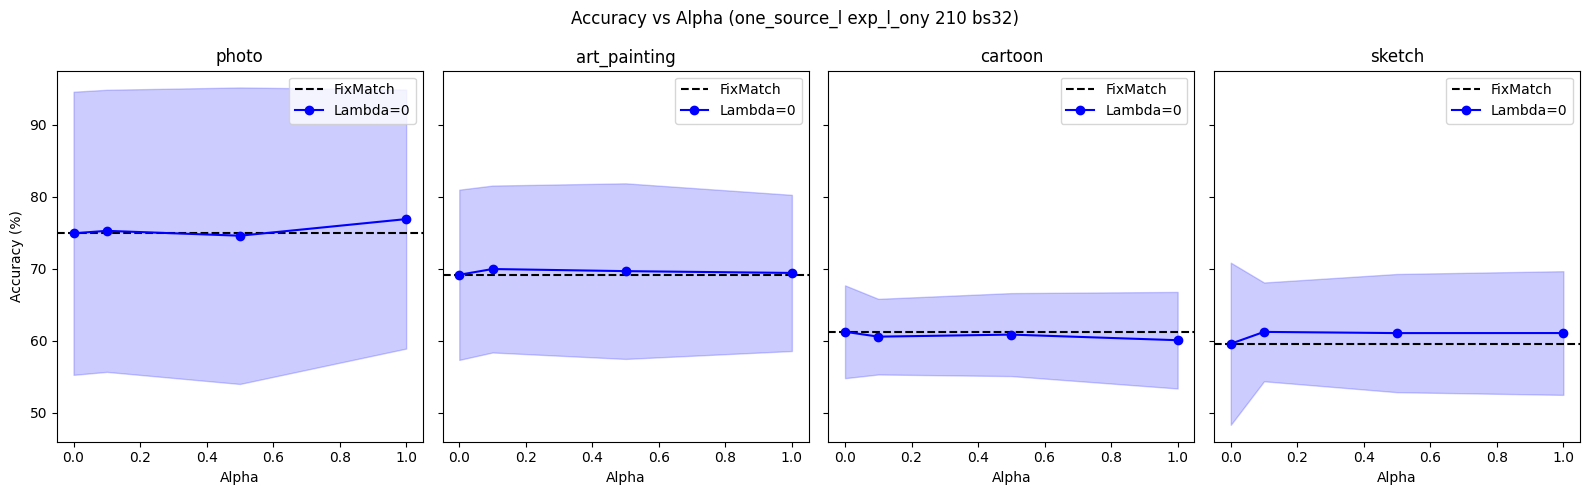

In [57]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha (one_source_l exp_l_ony 210 bs32)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [58]:
lambdas = [0]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/one_source_l/original/MI/lambdad_{lam}_alpha_{alpha}/batchsize_16/MI/resnet18/{t}"
                avg, std = parse_function_1ls(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 72.2% +- 15.0%
Average accuracy for lambdad_0_alpha_0.1: 71.7% +- 15.0%
Average accuracy for lambdad_0_alpha_0.5: 70.7% +- 16.2%
Average accuracy for lambdad_0_alpha_1: 71.6% +- 17.7%
-----------------------------------------------------------
Target: art_painting


Average accuracy for lambdad_0_alpha_0: 69.3% +- 6.8%
Average accuracy for lambdad_0_alpha_0.1: 68.8% +- 7.4%
Average accuracy for lambdad_0_alpha_0.5: 70.2% +- 6.2%
Average accuracy for lambdad_0_alpha_1: 69.6% +- 7.2%
-----------------------------------------------------------
Target: cartoon
Average accuracy for lambdad_0_alpha_0: 63.9% +- 3.7%
Average accuracy for lambdad_0_alpha_0.1: 64.2% +- 5.0%
Average accuracy for lambdad_0_alpha_0.5: 64.5% +- 3.5%
Average accuracy for lambdad_0_alpha_1: 63.9% +- 4.7%
-----------------------------------------------------------
Target: sketch
Average accuracy for lambdad_0_alpha_0: 67.8% +- 7.3%
Average accuracy for lambdad_0_alpha_0.1: 67.9% +- 5.0%
Average accuracy for lambdad_0_alpha_0.5: 70.0% +- 4.2%
Average accuracy for lambdad_0_alpha_1: 69.0% +- 4.6%
-----------------------------------------------------------


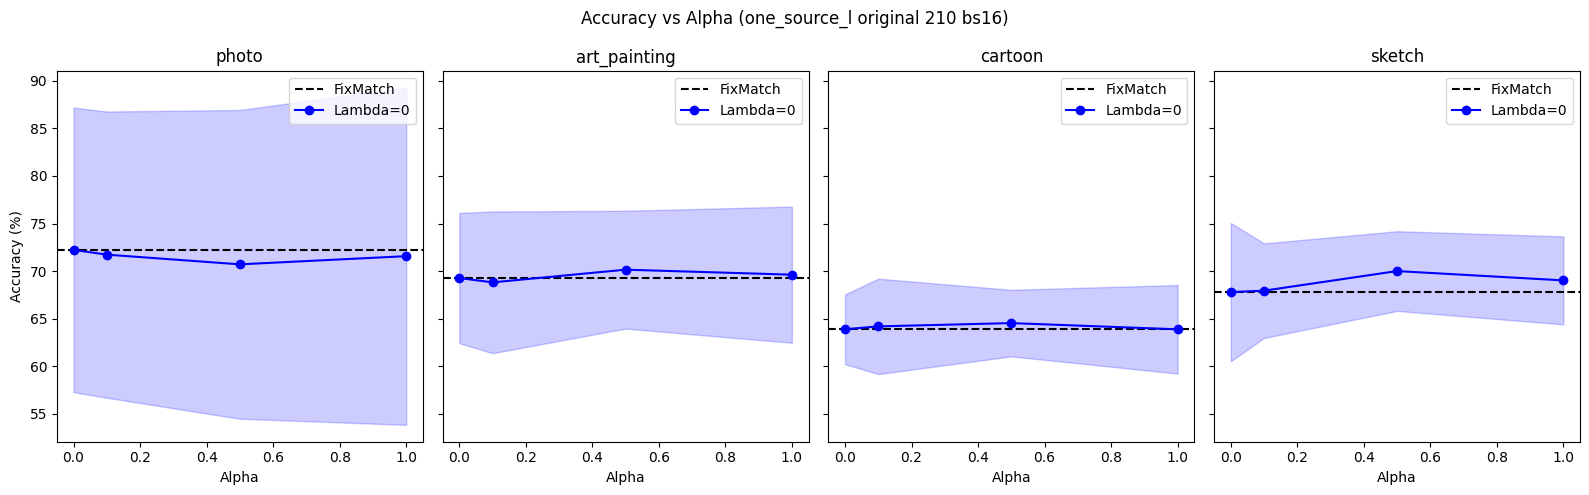

In [59]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha (one_source_l original 210 bs16)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [60]:
lambdas = [0]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for lam in lambdas:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/one_source_l/original/MI/lambdad_{lam}_alpha_{alpha}/batchsize_32/MI/resnet18/{t}"
                avg, std = parse_function_1ls(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(lam, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 79.7% +- 15.2%
Average accuracy for lambdad_0_alpha_0.1: 81.3% +- 13.9%
Average accuracy for lambdad_0_alpha_0.5: 79.3% +- 16.2%
Average accuracy for lambdad_0_alpha_1: 79.0% +- 16.2%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 73.0% +- 7.7%
Average accuracy for lambdad_0_alpha_0.1: 73.8% +- 6.5%
Average accuracy for lambdad_0_alpha_0.5: 72.6% +- 6.1%
Average accuracy for lambdad_0_alpha_1: 72.1% +- 7.3%
-----------------------------------------------------------
Target: cartoon
Average accuracy for lambdad_0_alpha_0: 67.0% +- 3.6%
Average accuracy for lambdad_0_alpha_0.1: 67.9% +- 4.3%


Average accuracy for lambdad_0_alpha_0.5: 68.4% +- 3.7%
Average accuracy for lambdad_0_alpha_1: 67.0% +- 3.1%
-----------------------------------------------------------
Target: sketch
Average accuracy for lambdad_0_alpha_0: 62.1% +- 11.3%
Average accuracy for lambdad_0_alpha_0.1: 65.0% +- 9.2%
Average accuracy for lambdad_0_alpha_0.5: 64.4% +- 9.7%
Average accuracy for lambdad_0_alpha_1: 65.1% +- 9.8%
-----------------------------------------------------------


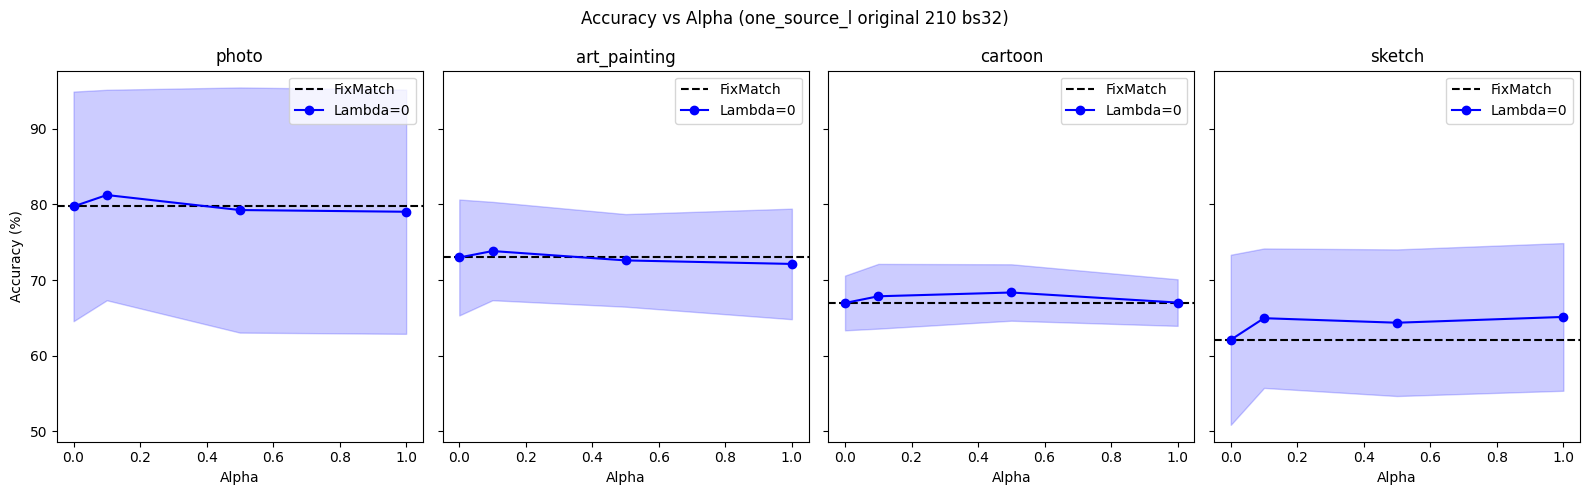

In [61]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha (one_source_l original 210 bs32)')

# Define colors for each lambda
colors = ['blue', 'red']


# Iterate over targets
for i, target in enumerate(targets):
    # Plot the baseline
    try:
        ax[i].axhline(y=results[(0, 0, target)][0], color='black', linestyle='--', label='FixMatch')
    except KeyError:
        pass
    # Iterate over lambdas
    for j, lam in enumerate(lambdas):
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(lam, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'Lambda={lam}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

## OfficeHome

In [77]:
batch_sizes = [16, 32]
alphas = [0, 0.1, 0.5, 1]
targets = ['art', 'clipart', 'product', 'real_world']
results = {}
for t in targets:
    print(f"Target: {t}")
    for bs in batch_sizes:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_officehome/nlab_1950/all_sources_l/exp_l_only/MI/lambdad_0_alpha_{alpha}/batchsize_{bs}/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(bs, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: art
Average accuracy for lambdad_0_alpha_0: 47.9% +- 1.8%
Average accuracy for lambdad_0_alpha_0.1: 48.3% +- 1.0%
Average accuracy for lambdad_0_alpha_0.5: 48.3% +- 1.8%
Average accuracy for lambdad_0_alpha_1: 48.5% +- 1.4%
Average accuracy for lambdad_0_alpha_0: 52.6% +- 1.2%
Average accuracy for lambdad_0_alpha_0.1: 52.8% +- 1.2%
Average accuracy for lambdad_0_alpha_0.5: 52.6% +- 1.5%
Average accuracy for lambdad_0_alpha_1: 52.3% +- 1.6%
-----------------------------------------------------------
Target: clipart
Average accuracy for lambdad_0_alpha_0: 45.8% +- 0.8%
Average accuracy for lambdad_0_alpha_0.1: 46.0% +- 1.9%
Average accuracy for lambdad_0_alpha_0.5: 45.6% +- 0.9%
Average accuracy for lambdad_0_alpha_1: 45.8% +- 0.9%
Average accuracy for lambdad_0_alpha_0: 46.8% +- 1.2%
Average accuracy for lambdad_0_alpha_0.1: 46.9% +- 1.1%
Average accuracy for lambdad_0_alpha_0.5: 46.6% +- 1.1%
Average accuracy for lambdad_0_alpha_1: 46.7% +- 0.8%
--------------------------------

Average accuracy for lambdad_0_alpha_0: 65.3% +- 0.6%
Average accuracy for lambdad_0_alpha_0.1: 65.3% +- 0.8%
Average accuracy for lambdad_0_alpha_0.5: 65.1% +- 0.6%
Average accuracy for lambdad_0_alpha_1: 65.2% +- 0.4%
-----------------------------------------------------------
Target: real_world
Average accuracy for lambdad_0_alpha_0: 65.5% +- 0.6%
Average accuracy for lambdad_0_alpha_0.1: 65.1% +- 0.5%
Average accuracy for lambdad_0_alpha_0.5: 65.1% +- 0.7%
Average accuracy for lambdad_0_alpha_1: 65.1% +- 0.7%
Average accuracy for lambdad_0_alpha_0: 68.7% +- 0.4%
Average accuracy for lambdad_0_alpha_0.1: 68.7% +- 0.7%
Average accuracy for lambdad_0_alpha_0.5: 68.6% +- 0.6%
Average accuracy for lambdad_0_alpha_1: 68.4% +- 0.7%
-----------------------------------------------------------


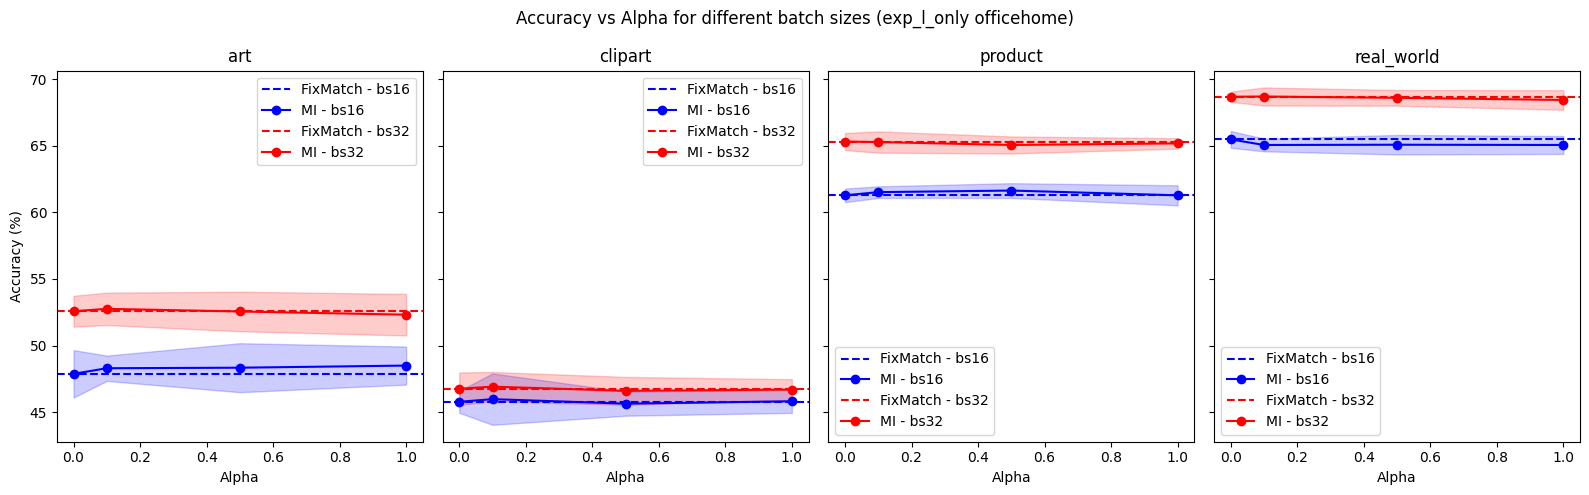

In [78]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different batch sizes (exp_l_only officehome)')

# Define colors for each batch size
colors = ['blue', 'red']

# Iterate over targets
for i, target in enumerate(targets):
    # Iterate over batch sizes
    for j, bs in enumerate(batch_sizes):
        # Plot the baseline
        try:
            ax[i].axhline(y=results[(bs, 0, target)][0], linestyle='--', label=f'FixMatch - bs{bs}', color=colors[j])
        except KeyError:
            pass
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(bs, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'MI - bs{bs}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [80]:
batch_sizes = [16, 32]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for bs in batch_sizes:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/exp_l_only/MI/lambdad_0_alpha_{alpha}/batchsize_{bs}/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(bs, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 83.5% +- 4.9%
Average accuracy for lambdad_0_alpha_0.1: 84.9% +- 1.8%
Average accuracy for lambdad_0_alpha_0.5: 85.5% +- 2.1%
Average accuracy for lambdad_0_alpha_1: 83.3% +- 2.5%
Average accuracy for lambdad_0_alpha_0: 89.7% +- 1.5%
Average accuracy for lambdad_0_alpha_0.1: 89.6% +- 2.2%
Average accuracy for lambdad_0_alpha_0.5: 89.7% +- 1.2%
Average accuracy for lambdad_0_alpha_1: 89.1% +- 1.2%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 71.8% +- 2.2%
Average accuracy for lambdad_0_alpha_0.1: 74.0% +- 2.7%
Average accuracy for lambdad_0_alpha_0.5: 70.9% +- 2.3%
Average accuracy for lambdad_0_alpha_1: 73.5% +- 3.5%
Average accuracy for lambdad_0_alpha_0: 76.4% +- 2.1%
Average accuracy for lambdad_0_alpha_0.1: 76.9% +- 1.5%
Average accuracy for lambdad_0_alpha_0.5: 75.4% +- 2.4%
Average accuracy for lambdad_0_alpha_1: 74.5% +- 1.8%
-------------------------

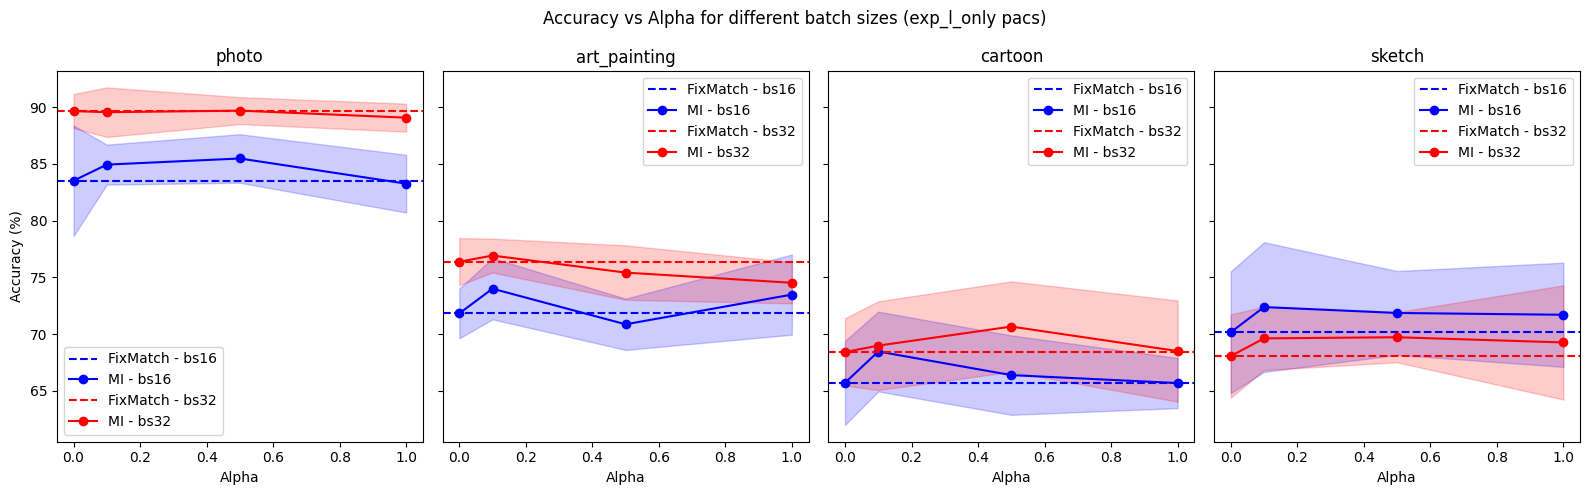

In [81]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different batch sizes (exp_l_only pacs)')

# Define colors for each batch size
colors = ['blue', 'red']

# Iterate over targets
for i, target in enumerate(targets):
    # Iterate over batch sizes
    for j, bs in enumerate(batch_sizes):
        # Plot the baseline
        try:
            ax[i].axhline(y=results[(bs, 0, target)][0], linestyle='--', label=f'FixMatch - bs{bs}', color=colors[j])
        except KeyError:
            pass
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(bs, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'MI - bs{bs}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [82]:
batch_sizes = [16, 32]
alphas = [0, 0.1, 0.5, 1]
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    for bs in batch_sizes:
        for alpha in alphas:
            try:
                parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/MI/lambdad_0_alpha_{alpha}/batchsize_{bs}/MI/resnet18/{t}"
                avg, std = parse_function(metric, directory=parent_directory, pattern=pattern, end_signal=end_signal)[keyword]
                results[(bs, alpha, t)] = (avg, std)
                print(f"Average {keyword} for lambdad_{lam}_alpha_{alpha}: {avg:.1f}% +- {std:.1f}%")
            except:
                print(f"{parent_directory} not found")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy for lambdad_0_alpha_0: 85.9% +- 2.7%
Average accuracy for lambdad_0_alpha_0.1: 86.0% +- 2.9%
Average accuracy for lambdad_0_alpha_0.5: 81.8% +- 9.9%
Average accuracy for lambdad_0_alpha_1: 83.1% +- 8.6%
Average accuracy for lambdad_0_alpha_0: 91.1% +- 1.3%
Average accuracy for lambdad_0_alpha_0.1: 90.8% +- 1.2%
Average accuracy for lambdad_0_alpha_0.5: 90.6% +- 1.4%
Average accuracy for lambdad_0_alpha_1: 90.6% +- 1.4%
-----------------------------------------------------------
Target: art_painting
Average accuracy for lambdad_0_alpha_0: 77.3% +- 2.4%
Average accuracy for lambdad_0_alpha_0.1: 75.8% +- 2.4%
Average accuracy for lambdad_0_alpha_0.5: 75.9% +- 1.7%
Average accuracy for lambdad_0_alpha_1: 75.8% +- 1.6%
Average accuracy for lambdad_0_alpha_0: 78.9% +- 1.0%
Average accuracy for lambdad_0_alpha_0.1: 79.1% +- 1.3%
Average accuracy for lambdad_0_alpha_0.5: 79.1% +- 1.4%
Average accuracy for lambdad_0_alpha_1: 78.8% +- 1.8%
-------------------------

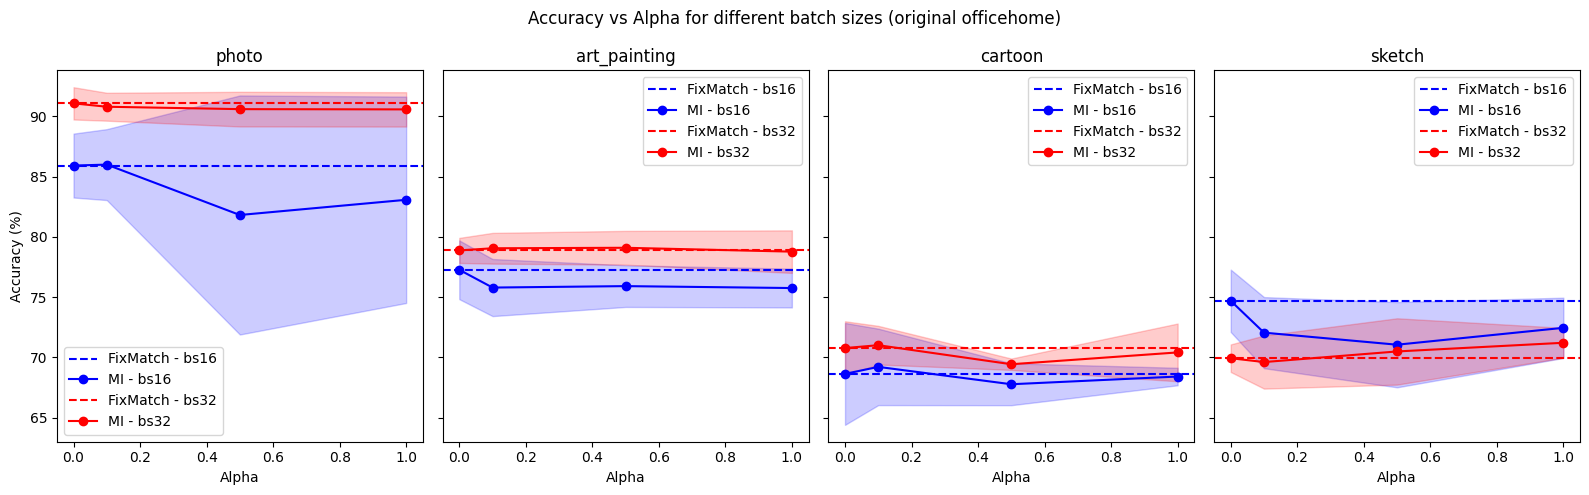

In [83]:
# Create a single subplot for all targets
fig, ax = plt.subplots(1, len(targets), figsize=(4 * len(targets), 5), sharey=True)
fig.suptitle('Accuracy vs Alpha for different batch sizes (original officehome)')

# Define colors for each batch size
colors = ['blue', 'red']

# Iterate over targets
for i, target in enumerate(targets):
    # Iterate over batch sizes
    for j, bs in enumerate(batch_sizes):
        # Plot the baseline
        try:
            ax[i].axhline(y=results[(bs, 0, target)][0], linestyle='--', label=f'FixMatch - bs{bs}', color=colors[j])
        except KeyError:
            pass
        x_values = []
        y_values = []
        std_values = []
        
        # Iterate over alphas
        for alpha in alphas:
            try:
                # Get the average and std for the current lambda and alpha
                avg, std = results[(bs, alpha, target)]
                x_values.append(alpha)
                y_values.append(avg)
                std_values.append(std)
            except KeyError:
                continue
        
        # Plot the line and fill_between for the current lambda in the corresponding subplot
        ax[i].plot(x_values, y_values, marker='o', label=f'MI - bs{bs}', color=colors[j])
        ax[i].fill_between(x_values, [y - std for y, std in zip(y_values, std_values)], [y + std for y, std in zip(y_values, std_values)], alpha=0.2, color=colors[j])
    
    ax[i].set_xlabel('Alpha')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].legend()

plt.tight_layout()
plt.show()

### Convergence towards a trivial solution

In [68]:
def parse_function_per_class(directory="", pattern=None):
    subdirs = listdir_nohidden(directory, sort=True)

    sorted_accuracies = defaultdict(list)

    for subdir in subdirs:
        fpath = osp.join(directory, subdir, "log.txt")
        if pattern:
            fpath = glob.glob(osp.join(directory, subdir, pattern))[-1]
        assert check_isfile(fpath)
        results = False
        per_class_results = False
        per_class_accuracies = []

        with open(fpath, "r") as f:
            lines = f.readlines()

            for line in lines:
                line = line.strip()

                if '=> per-class result' in line:
                    per_class_results = True
                    continue
                
                if per_class_results:
                    match = re.match(r'\* class: (\d+) \(\)\ttotal: \d+\tcorrect: \d+\tacc: ([\d\.]+)%', line)
                    if match:
                        accuracy = float(match.group(2))
                        per_class_accuracies.append(accuracy)
                    continue
        
        per_class_accuracies_sorted = np.sort(per_class_accuracies)[::-1]
        for i, acc in enumerate(per_class_accuracies_sorted):
            sorted_accuracies[i].append(acc)

    output_avg = []
    output_std = []
    for accs in sorted_accuracies.values():
        output_avg.append(np.mean(accs))
        output_std.append(np.std(accs))

    return output_avg, output_std

In [69]:
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/FBCSA/resnet18/{t}"
    avgs, stds = parse_function_per_class(directory=parent_directory, pattern='log.txt-2024-08-26*')
    results[t] = (avgs, stds)
    for avg, std in zip(avgs, stds):
        print(f"Average accuracy: {avg:.1f}% +- {std:.1f}%")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy: 100.0% +- 0.0%
Average accuracy: 99.8% +- 0.4%
Average accuracy: 89.4% +- 4.9%
Average accuracy: 86.2% +- 4.4%
Average accuracy: 81.2% +- 4.6%
Average accuracy: 67.3% +- 3.1%
Average accuracy: 54.5% +- 8.9%
-----------------------------------------------------------
Target: art_painting
Average accuracy: 94.7% +- 2.1%
Average accuracy: 90.1% +- 2.0%
Average accuracy: 82.9% +- 4.3%
Average accuracy: 80.7% +- 5.7%
Average accuracy: 77.7% +- 5.1%
Average accuracy: 64.9% +- 7.2%
Average accuracy: 56.0% +- 7.2%
-----------------------------------------------------------
Target: cartoon
Average accuracy: 98.3% +- 0.3%
Average accuracy: 94.2% +- 3.6%
Average accuracy: 90.4% +- 3.0%
Average accuracy: 71.0% +- 7.2%
Average accuracy: 59.5% +- 3.6%
Average accuracy: 52.3% +- 7.1%
Average accuracy: 44.4% +- 7.1%
-----------------------------------------------------------
Target: sketch
Average accuracy: 98.9% +- 0.6%
Average accuracy: 93.3% +- 2.5%
Average accuracy:

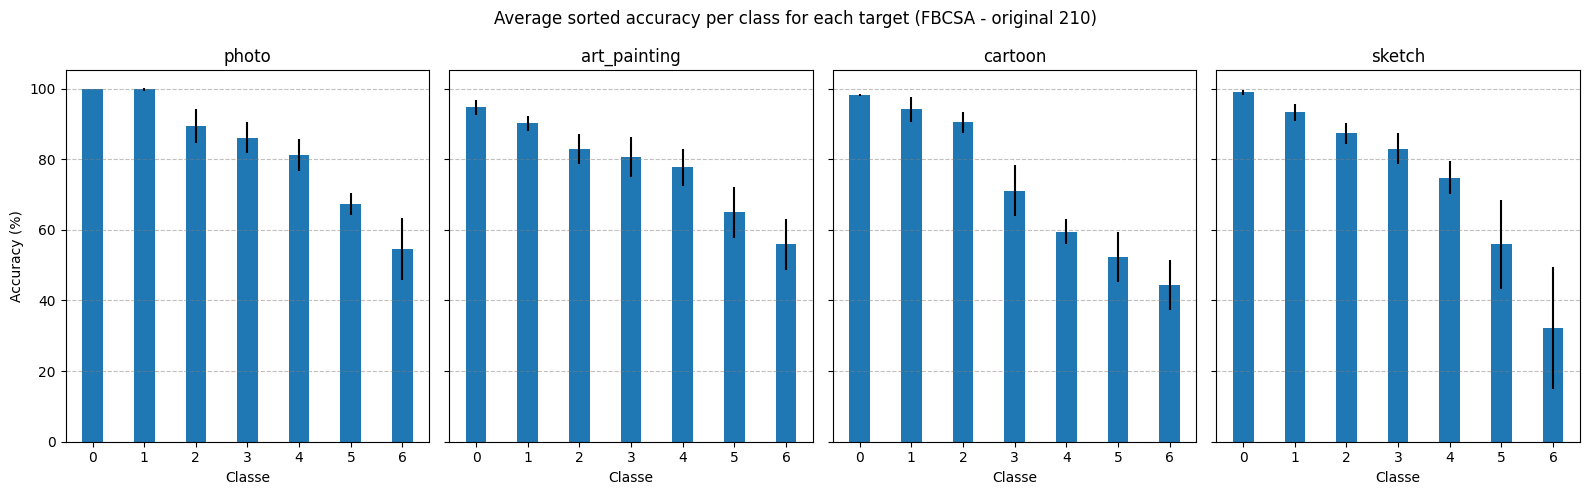

In [70]:
# Set the width of the bars
bar_width = 0.4

# Create a subplot for each target
fig, ax = plt.subplots(1, len(targets), figsize=(16, 5), sharey=True)

# Iterate over the targets
for i, target in enumerate(targets):
    avg, std = results[target]

    x = np.arange(len(avg))

    # Set the grid
    ax[i].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
    
    # Plot the bars with error bars
    ax[i].bar(x, avg, bar_width, yerr=std, align='center')
    
    # Set the labels and title for each subplot
    ax[i].set_xlabel('Classe')
    if i == 0:
        ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_title(target)
    ax[i].set_xticks(x)

plt.suptitle('Average sorted accuracy per class for each target (FBCSA - original 210)')
plt.tight_layout()
plt.show()


In [71]:
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/MI/lambdad_0_alpha_0/batchsize_16/MI/resnet18/{t}"
    avgs, stds = parse_function_per_class(directory=parent_directory, pattern='log.txt')
    results[t] = (avgs, stds)
    for avg, std in zip(avgs, stds):
        print(f"Average accuracy: {avg:.1f}% +- {std:.1f}%")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy: 100.0% +- 0.0%
Average accuracy: 98.3% +- 3.3%
Average accuracy: 88.3% +- 2.7%
Average accuracy: 83.4% +- 2.9%
Average accuracy: 80.2% +- 2.4%
Average accuracy: 75.7% +- 3.2%
Average accuracy: 56.6% +- 14.7%
-----------------------------------------------------------
Target: art_painting
Average accuracy: 93.1% +- 1.1%
Average accuracy: 85.9% +- 3.8%
Average accuracy: 80.9% +- 2.8%
Average accuracy: 77.4% +- 2.2%
Average accuracy: 75.0% +- 2.3%
Average accuracy: 65.6% +- 6.0%
Average accuracy: 59.2% +- 6.7%
-----------------------------------------------------------
Target: cartoon
Average accuracy: 98.2% +- 0.8%
Average accuracy: 90.8% +- 2.6%
Average accuracy: 86.8% +- 5.5%
Average accuracy: 72.7% +- 5.7%
Average accuracy: 59.0% +- 5.9%
Average accuracy: 52.4% +- 8.1%
Average accuracy: 47.8% +- 9.9%
-----------------------------------------------------------
Target: sketch
Average accuracy: 98.7% +- 1.1%
Average accuracy: 92.9% +- 4.5%
Average accuracy

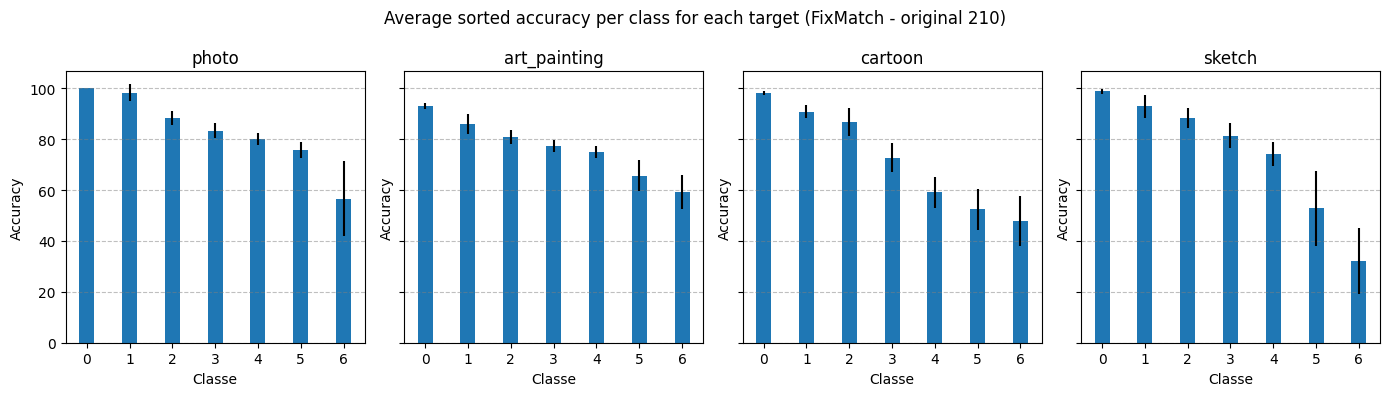

In [72]:
# Set the width of the bars
bar_width = 0.35

# Create a subplot for each target
fig, ax = plt.subplots(1, len(targets), figsize=(14, 4), sharey=True)

# Iterate over the targets
for i, target in enumerate(targets):
    avg, std = results[target]

    x = np.arange(len(avg))

    # Set the grid
    ax[i].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
    
    # Plot the bars with error bars
    ax[i].bar(x, avg, bar_width, yerr=std, align='center')
    
    # Set the labels and title for each subplot
    ax[i].set_xlabel('Classe')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(target)
    ax[i].set_xticks(x)

plt.suptitle('Average sorted accuracy per class for each target (FixMatch - original 210)')
plt.tight_layout()
plt.show()


In [73]:
targets = ['photo', 'art_painting', 'cartoon', 'sketch']
results = {}
for t in targets:
    print(f"Target: {t}")
    parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/original/MI/lambdad_0_alpha_1/batchsize_16/MI/resnet18/{t}"
    avgs, stds = parse_function_per_class(directory=parent_directory, pattern='log.txt')
    results[t] = (avgs, stds)
    for avg, std in zip(avgs, stds):
        print(f"Average accuracy: {avg:.1f}% +- {std:.1f}%")
    print('-----------------------------------------------------------')

Target: photo
Average accuracy: 100.0% +- 0.0%
Average accuracy: 97.1% +- 5.4%
Average accuracy: 87.7% +- 4.5%
Average accuracy: 82.9% +- 3.0%
Average accuracy: 79.8% +- 3.0%
Average accuracy: 71.9% +- 8.3%
Average accuracy: 53.3% +- 18.4%
-----------------------------------------------------------
Target: art_painting
Average accuracy: 94.3% +- 0.6%
Average accuracy: 88.4% +- 4.2%
Average accuracy: 79.8% +- 4.7%
Average accuracy: 75.8% +- 3.1%
Average accuracy: 71.0% +- 5.5%
Average accuracy: 61.5% +- 5.6%
Average accuracy: 54.2% +- 3.3%
-----------------------------------------------------------
Target: cartoon
Average accuracy: 96.9% +- 2.0%
Average accuracy: 92.1% +- 2.3%
Average accuracy: 86.0% +- 4.5%
Average accuracy: 72.2% +- 7.0%
Average accuracy: 58.4% +- 2.6%
Average accuracy: 53.6% +- 3.3%
Average accuracy: 46.8% +- 4.1%
-----------------------------------------------------------
Target: sketch
Average accuracy: 98.5% +- 1.0%
Average accuracy: 92.7% +- 2.2%
Average accuracy

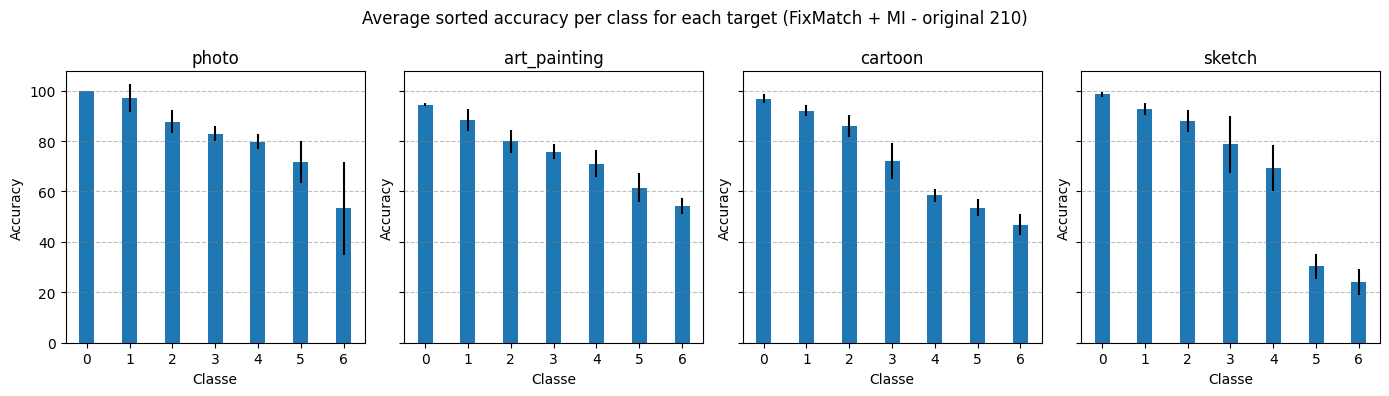

In [74]:
# Set the width of the bars
bar_width = 0.35

# Create a subplot for each target
fig, ax = plt.subplots(1, len(targets), figsize=(14, 4), sharey=True)

# Iterate over the targets
for i, target in enumerate(targets):
    avg, std = results[target]

    x = np.arange(len(avg))

    # Set the grid
    ax[i].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
    
    # Plot the bars with error bars
    ax[i].bar(x, avg, bar_width, yerr=std, align='center')
    
    # Set the labels and title for each subplot
    ax[i].set_xlabel('Classe')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(target)
    ax[i].set_xticks(x)

plt.suptitle('Average sorted accuracy per class for each target (FixMatch + MI - original 210)')
plt.tight_layout()
plt.show()

### Average accuracy

In [75]:
def parse_function(*metrics, directory="", pattern=None, end_signal=None):
    subdirs = listdir_nohidden(directory, sort=True)

    outputs = []

    for subdir in subdirs:
        fpath = osp.join(directory, subdir, "log.txt")
        if pattern:
            fpath = glob.glob(osp.join(directory, subdir, pattern))[-1]
        assert check_isfile(fpath)
        results = False
        output = OrderedDict()

        with open(fpath, "r") as f:
            lines = f.readlines()

            for line in lines:
                line = line.strip()

                if line == end_signal:
                    results = True
                    continue

                for metric in metrics:
                    match = metric["regex"].search(line)
                    if match and results:
                        if "file" not in output:
                            output["file"] = fpath
                        num = float(match.group(1))
                        name = metric["name"]
                        output[name] = num
                    continue

        if output:
            outputs.append(output)

    assert len(outputs) > 0, f"Nothing found in {directory}"

    metrics_results = defaultdict(list)
    for output in outputs:
        msg = ""
        for key, value in output.items():
            if isinstance(value, float):
                msg += f"{key}: {value:.1f}%. "
            else:
                msg += f"{key}: {value}. "
            if key != "file":
                metrics_results[key].append(value)

    output_results = OrderedDict()
    for key, values in metrics_results.items():
        avg = np.mean(values)
        std = np.std(values)
        output_results[key] = (avg, std)

    return output_results


def parse_function_1ls(*metrics, directory="", pattern=None, end_signal=None):
    subdirs = listdir_nohidden(directory, sort=True)

    outputs = []

    for subdir in subdirs:
        for subsubdir in listdir_nohidden(osp.join(directory, subdir), sort=True):
            fpath = osp.join(directory, subdir, subsubdir, "log.txt")
            if pattern:
                fpath = glob.glob(osp.join(directory, subdir, subsubdir, pattern))[-1]
            assert check_isfile(fpath)
            results = False
            output = OrderedDict()

            with open(fpath, "r") as f:
                lines = f.readlines()

                for line in lines:
                    line = line.strip()

                    if line == end_signal:
                        results = True
                        continue

                    for metric in metrics:
                        match = metric["regex"].search(line)
                        if match and results:
                            if "file" not in output:
                                output["file"] = fpath
                            num = float(match.group(1))
                            name = metric["name"]
                            output[name] = num
                        continue

            if output:
                outputs.append(output)

    assert len(outputs) > 0, f"Nothing found in {directory}"

    metrics_results = defaultdict(list)
    for output in outputs:
        msg = ""
        for key, value in output.items():
            if isinstance(value, float):
                msg += f"{key}: {value:.1f}%. "
            else:
                msg += f"{key}: {value}. "
            if key != "file":
                metrics_results[key].append(value)

    output_results = OrderedDict()
    for key, values in metrics_results.items():
        avg = np.mean(values)
        std = np.std(values)
        output_results[key] = (avg, std)

    return output_results


def main(keyword, parent_directory, pattern, end_signal):
    m = {
        "name": keyword,
        "regex": re.compile(fr"\* {keyword}: ([\.\deE+-]+)%"),
    }
    final_results = defaultdict(list)

    for directory in listdir_nohidden(parent_directory, sort=True):
        directory = osp.join(parent_directory, directory)
        results = parse_function(
            m, directory=directory, pattern=pattern, end_signal=end_signal
        )

        for key, value in results.items():
            final_results[key].append(value[0])

    for key, values in final_results.items():
        avg = np.mean(values)
        std = np.std(values)
    
    return avg, std

In [76]:
alphas=[0,0.1]
exp = ['original', 'exp_l_only']

for a in alphas:
    for e in exp:
        parent_directory = f"output/ssdg_pacs/nlab_210/all_sources_l/{e}/MI/lambdad_0_alpha_{a}/batchsize_16/MI/resnet18"
        avg, std = main(keyword, parent_directory=parent_directory, pattern='log.txt', end_signal=end_signal)
        print(f"Average {keyword} for {e} and alpha {a}: {avg:.1f}% +- {std:.1f}%")

Average accuracy for original and alpha 0: 76.6% +- 6.2%
Average accuracy for exp_l_only and alpha 0: 72.8% +- 6.6%
Average accuracy for original and alpha 0.1: 75.8% +- 6.4%
Average accuracy for exp_l_only and alpha 0.1: 74.9% +- 6.1%
